          Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum
885  1/31/2022  SLOT-19     12.835333  38.950000  38.173333  32.178333
886  1/31/2022  SLOT-20     17.132833  54.450000  37.083333  32.918333
887  1/31/2022  SLOT-21     18.453667  60.593220  34.803333  38.208333
888  1/31/2022  SLOT-22     19.309167  71.933333  32.070000  47.088333
889  1/31/2022  SLOT-22     19.309167  71.933333  32.070000  47.088333
(1000, 4)
(200, 4)
Loss functions:
* R-squared = -16.169353378600942
* RMSE = 48.21592199075663
* MAE = 45.71411164457
          Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum
885  1/31/2022  SLOT-19     12.835333  38.950000  38.173333  32.178333
886  1/31/2022  SLOT-20     17.132833  54.450000  37.083333  32.918333
887  1/31/2022  SLOT-21     18.453667  60.593220  34.803333  38.208333
888  1/31/2022  SLOT-22     19.309167  71.933333  32.070000  47.088333
889  1/31/2022  SLOT-22     19.309167  71.933333  32.070000  47.088333
Date             object
Slot 

<ipython-input-1-ccba108e78ef>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.5055394199390955


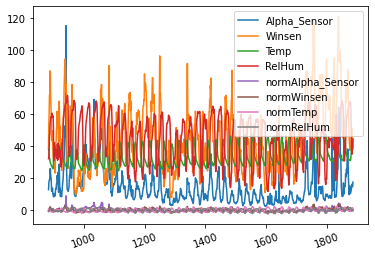

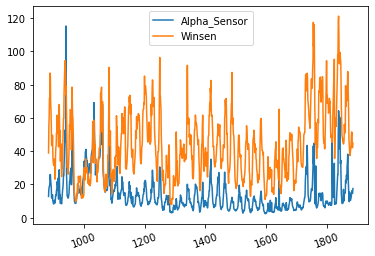

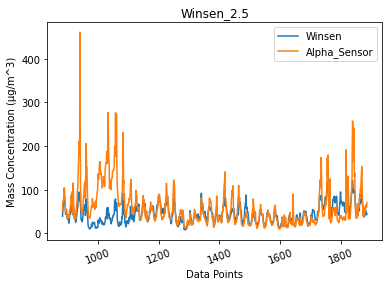

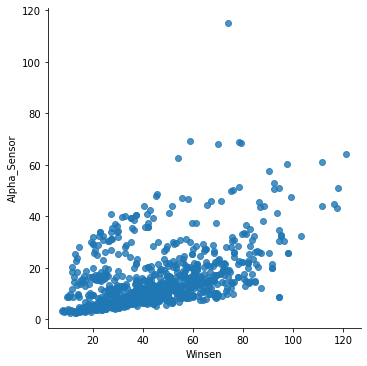

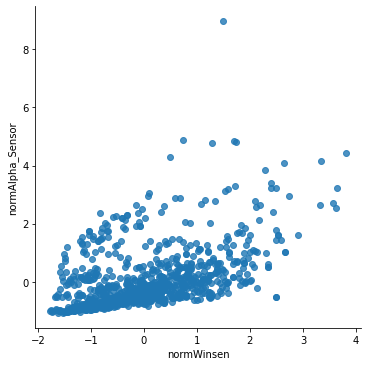

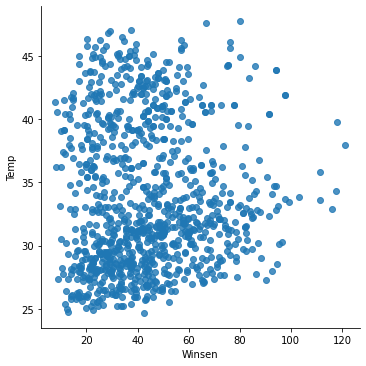

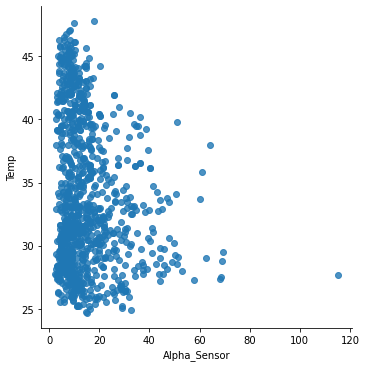

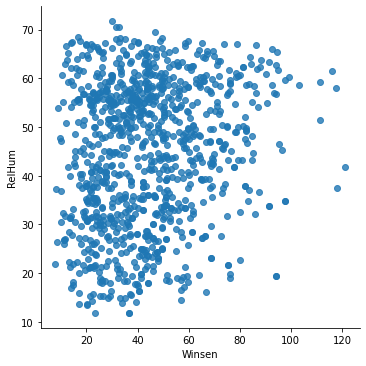

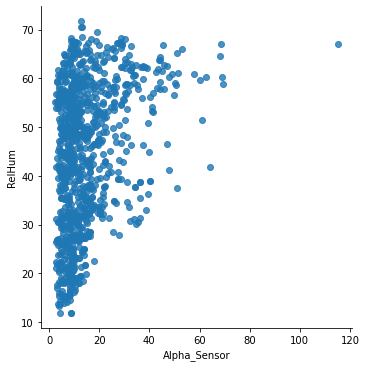

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_csv("Winsen_2.5.csv")

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["Alpha_Sensor"], 'Winsen': sensor["Winsen"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})
print(df.shape)

# Split main dataset and build train and test datasets
X = df[['Winsen', 'Temp', 'RelHum']]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'Winsen': X_train["Winsen"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'Winsen': X_test["Winsen"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})
print(df_test.shape)

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["Winsen"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normWinsen"] = normalize(df["Winsen"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Winsen = sensor[["Temp", "Winsen"]]
print(Temp_Winsen.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "Winsen"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Winsen_Alpha_Sensor_factor = df[["Winsen", "Alpha_Sensor"]]
Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]
Winsen_Alpha_Sensor_factor.plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Winsen', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normWinsen', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["Winsen"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -44.13227987448013
Coefficients: 
 [0.253139   0.81150975 0.48455163]
Loss functions:
* R-squared = 0.15687946679000797
* RMSE = 10.684601749765609
* MAE = 9.261997336212666
Intercept: 
 [14.23210569]
Coefficients: 
 [4.83437048 1.44588171 3.57357633]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = 0.3086695907170529
* RMSE = 9.675119467664528
* MAE = 8.306624082840518
Correlation_MLR_Pred:  nan
Correlation_MLR_SGD_Pred:  nan


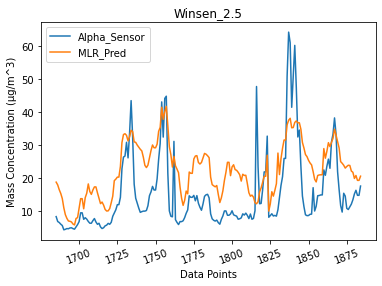

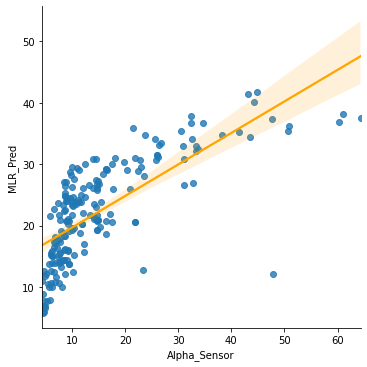

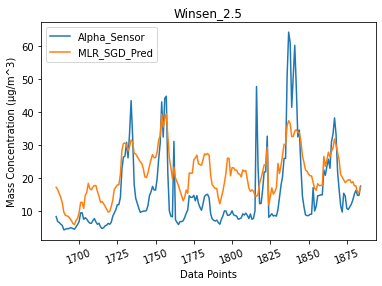

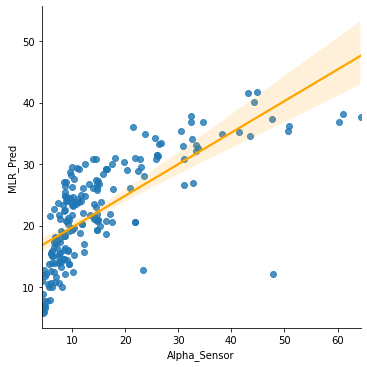

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Winsen"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

      Alpha_Sensor     Winsen       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1685      8.278167  42.491525  31.455000  54.901667  18.752713     17.190728   
1686      6.794068  39.700000  30.840678  55.652542  17.911379     16.447309   
1687      6.483103  36.033333  30.208621  55.636207  16.462367     15.270352   
1688      5.977833  31.650000  29.641667  56.510000  15.316083     14.128016   
1689      5.577119  25.271186  29.301695  57.208475  13.763913     12.447247   
...            ...        ...        ...        ...        ...           ...   
1880     15.161000  51.616667  40.686667  36.980000  19.870257     17.658700   
1881     16.276333  50.898305  43.206667  35.005000  20.776427     17.608351   
1882     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1883     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1884     17.562000  44.864407  39.293333  44.260000  20.557829     17.214151   

       KNN_Pred  
1685  13.154751  
168

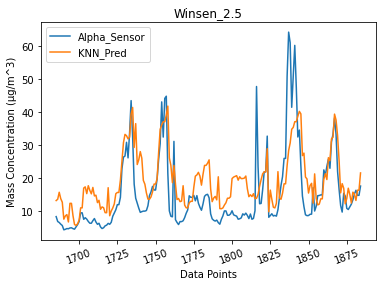

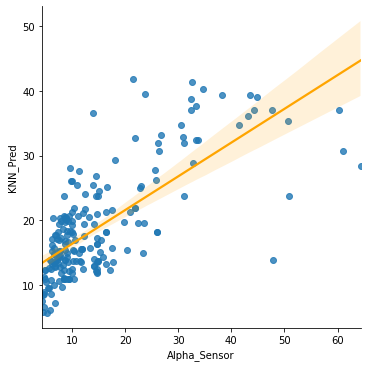

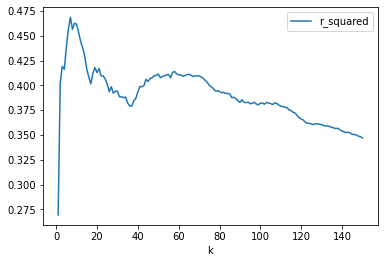

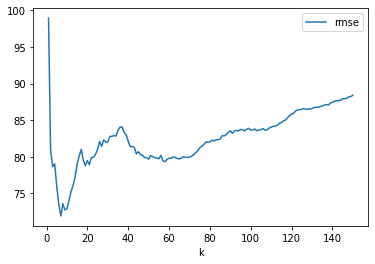

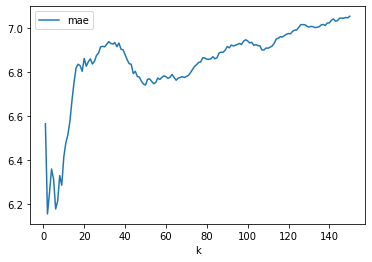

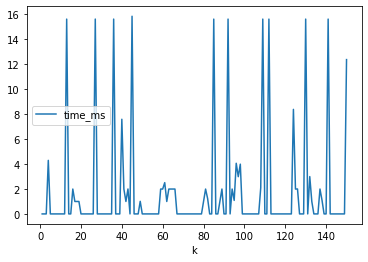

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

      Alpha_Sensor     Winsen       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1685      8.278167  42.491525  31.455000  54.901667  18.752713     17.190728   
1686      6.794068  39.700000  30.840678  55.652542  17.911379     16.447309   
1687      6.483103  36.033333  30.208621  55.636207  16.462367     15.270352   
1688      5.977833  31.650000  29.641667  56.510000  15.316083     14.128016   
1689      5.577119  25.271186  29.301695  57.208475  13.763913     12.447247   
...            ...        ...        ...        ...        ...           ...   
1880     15.161000  51.616667  40.686667  36.980000  19.870257     17.658700   
1881     16.276333  50.898305  43.206667  35.005000  20.776427     17.608351   
1882     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1883     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1884     17.562000  44.864407  39.293333  44.260000  20.557829     17.214151   

       KNN_Pred    RF_Pred  
1685  13.1

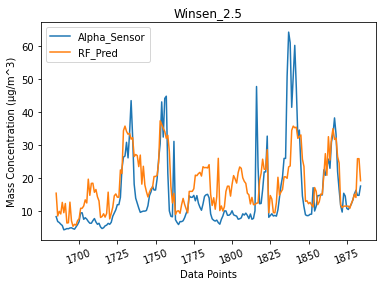

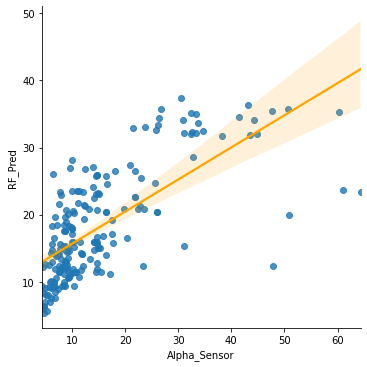

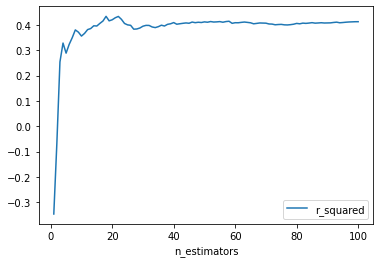

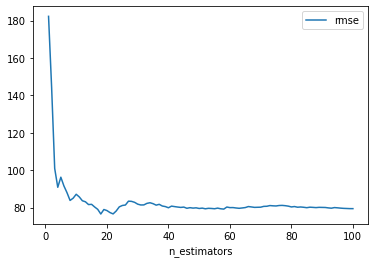

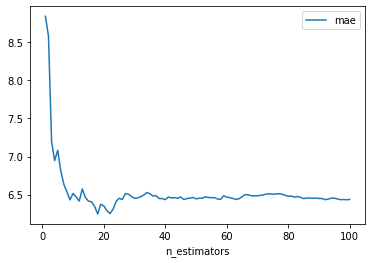

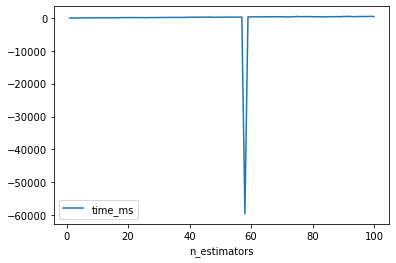

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

RBF params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = 0.3598597596134898
* RMSE = 9.310029785908169
* MAE = 7.766473255940643
       r_squared        rmse    

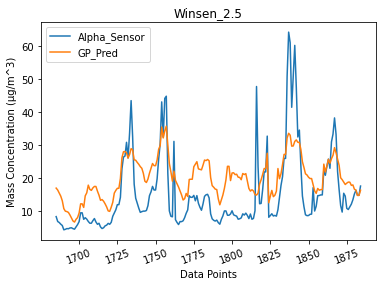

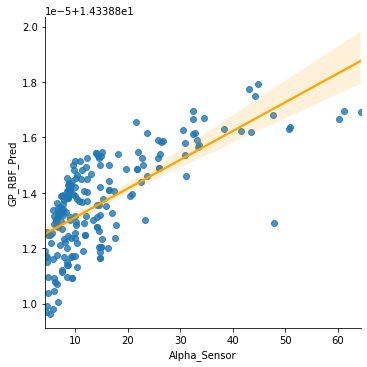

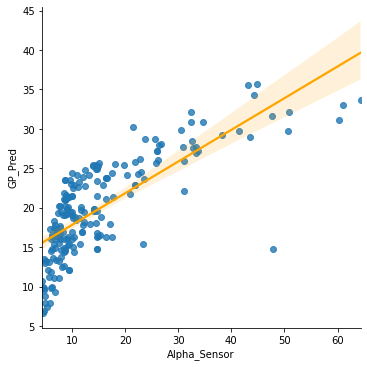

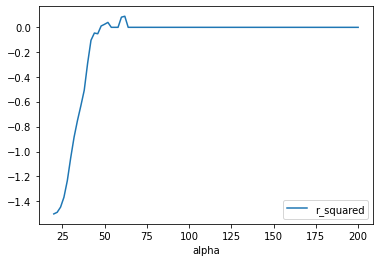

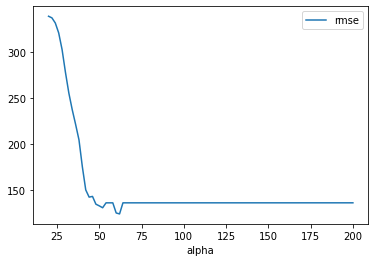

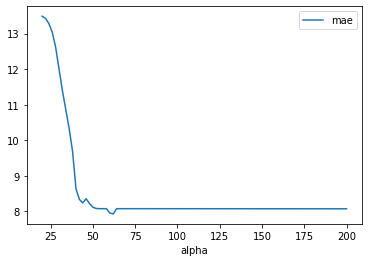

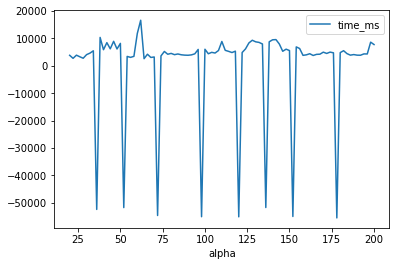

In [5]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 150, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_rbf.fit(X_train, Y_train)
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test)
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
#loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])


# %%
# Gaussian Process stats vs. hyperparameters
def gp_stats():
    gp_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    alpha = [*range(20, 202, 2)]
    # alpha = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50,100,150,200]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    rbf = ConstantKernel() * RBF()

    for i in alpha:
        gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = i, random_state = 0)
        # gp = GaussianProcessRegressor(kernel=rbf, alpha=i, random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        gp_rbf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        gp_aux["GP_RBF_Pred"] = gp_rbf.predict(X_test)

        # Loss
        r_squared.append(r2_score(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        rmse.append(mean_squared_error(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        mae.append(mean_absolute_error(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        time_ms.append(execution_time)

    gp_stats = pd.DataFrame({'alpha': alpha, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    gp_stats = gp_stats.set_index('alpha') # index column (X axis for the plots)
    print(gp_stats)

    # plot
    gp_stats[["r_squared"]].plot()
    gp_stats[["rmse"]].plot()
    gp_stats[["mae"]].plot()
    gp_stats[["time_ms"]].plot()

gp_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -0.3107666236328306
* RMSE = 13.322207486644949
* MAE = 9.131581156483136
Loss functions:
* R-squared = 0.4894040117304155
* RMSE = 8.314807617646492
* MAE = 6.328253507075337
Loss functions:
* R-squared = -1.5417912632903326
* RMSE = 18.55168866877244
* MAE = 11.556029236525378


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


      Alpha_Sensor     Winsen       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1685      8.278167  42.491525  31.455000  54.901667  18.752713     17.190728   
1686      6.794068  39.700000  30.840678  55.652542  17.911379     16.447309   
1687      6.483103  36.033333  30.208621  55.636207  16.462367     15.270352   
1688      5.977833  31.650000  29.641667  56.510000  15.316083     14.128016   
1689      5.577119  25.271186  29.301695  57.208475  13.763913     12.447247   
...            ...        ...        ...        ...        ...           ...   
1880     15.161000  51.616667  40.686667  36.980000  19.870257     17.658700   
1881     16.276333  50.898305  43.206667  35.005000  20.776427     17.608351   
1882     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1883     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1884     17.562000  44.864407  39.293333  44.260000  20.557829     17.214151   

       KNN_Pred    RF_Pred  GP_RBF_Pred

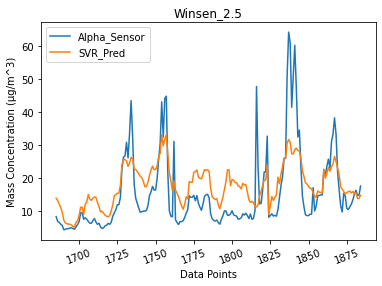

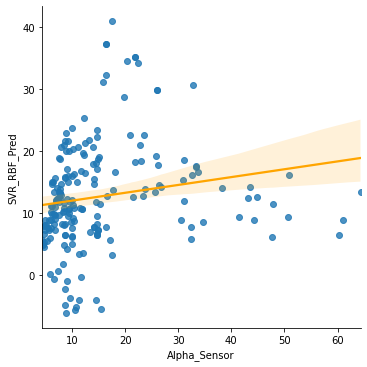

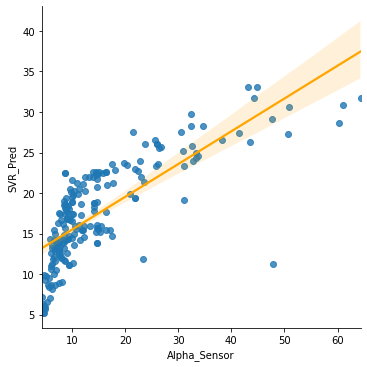

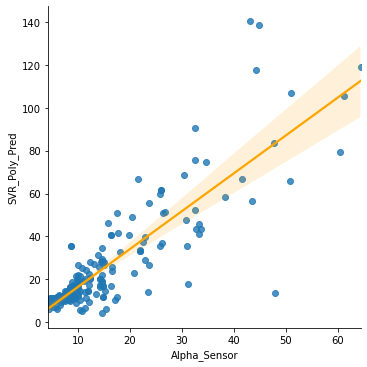

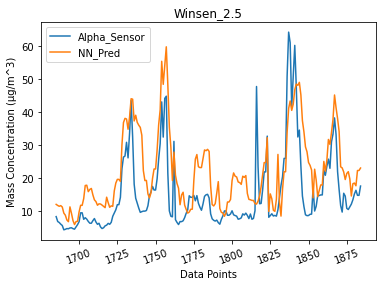

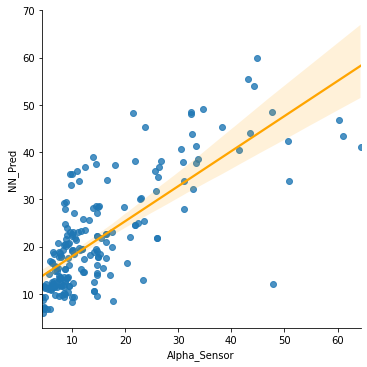

In [6]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])


# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
corr_lin = df_test["SVR_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)
print("Correlation_corr_lin: ", corr_lin)

2.10.0
Epoch 1/750
80/80 [==============================] - 2s 5ms/step - loss: 197.4746
Epoch 2/750
80/80 [==============================] - 0s 5ms/step - loss: 94.2117
Epoch 3/750
80/80 [==============================] - 0s 5ms/step - loss: 90.6545
Epoch 4/750
80/80 [==============================] - 0s 5ms/step - loss: 85.5269
Epoch 5/750
80/80 [==============================] - 0s 4ms/step - loss: 81.5136
Epoch 6/750
80/80 [==============================] - 0s 5ms/step - loss: 81.5084
Epoch 7/750
80/80 [==============================] - 0s 5ms/step - loss: 76.6013
Epoch 8/750
80/80 [==============================] - 0s 4ms/step - loss: 74.4212
Epoch 9/750
80/80 [==============================] - 0s 5ms/step - loss: 76.2612
Epoch 10/750
80/80 [==============================] - 0s 4ms/step - loss: 73.5789
Epoch 11/750
80/80 [==============================] - 0s 5ms/step - loss: 71.5553
Epoch 12/750
80/80 [==============================] - 0s 5ms/step - loss: 71.7846
Epoch 13/750
80/8

80/80 [==============================] - 0s 5ms/step - loss: 44.7821
Epoch 101/750
80/80 [==============================] - 0s 5ms/step - loss: 42.8354
Epoch 102/750
80/80 [==============================] - 0s 5ms/step - loss: 40.6693
Epoch 103/750
80/80 [==============================] - 0s 6ms/step - loss: 42.5036
Epoch 104/750
80/80 [==============================] - 0s 5ms/step - loss: 44.4532
Epoch 105/750
80/80 [==============================] - 0s 5ms/step - loss: 41.1568
Epoch 106/750
80/80 [==============================] - 0s 4ms/step - loss: 44.6295
Epoch 107/750
80/80 [==============================] - 0s 5ms/step - loss: 39.6077
Epoch 108/750
80/80 [==============================] - 0s 4ms/step - loss: 40.4759
Epoch 109/750
80/80 [==============================] - 0s 5ms/step - loss: 39.7066
Epoch 110/750
80/80 [==============================] - 0s 5ms/step - loss: 39.6358
Epoch 111/750
80/80 [==============================] - 0s 4ms/step - loss: 40.1455
Epoch 112/750
80/8

80/80 [==============================] - 0s 4ms/step - loss: 26.2535
Epoch 199/750
80/80 [==============================] - 0s 4ms/step - loss: 29.4539
Epoch 200/750
80/80 [==============================] - 0s 4ms/step - loss: 26.3100
Epoch 201/750
80/80 [==============================] - 0s 4ms/step - loss: 26.4150
Epoch 202/750
80/80 [==============================] - 0s 5ms/step - loss: 27.1173
Epoch 203/750
80/80 [==============================] - 0s 5ms/step - loss: 27.5721
Epoch 204/750
80/80 [==============================] - 0s 4ms/step - loss: 25.0616
Epoch 205/750
80/80 [==============================] - 0s 4ms/step - loss: 29.9595
Epoch 206/750
80/80 [==============================] - 0s 5ms/step - loss: 29.3001
Epoch 207/750
80/80 [==============================] - 0s 4ms/step - loss: 25.4053
Epoch 208/750
80/80 [==============================] - 0s 4ms/step - loss: 27.2758
Epoch 209/750
80/80 [==============================] - 0s 5ms/step - loss: 25.1344
Epoch 210/750
80/8

80/80 [==============================] - 0s 4ms/step - loss: 19.2713
Epoch 297/750
80/80 [==============================] - 0s 4ms/step - loss: 15.6602
Epoch 298/750
80/80 [==============================] - 0s 4ms/step - loss: 15.4993
Epoch 299/750
80/80 [==============================] - 0s 6ms/step - loss: 16.3487
Epoch 300/750
80/80 [==============================] - 0s 4ms/step - loss: 18.4264
Epoch 301/750
80/80 [==============================] - 0s 4ms/step - loss: 16.2222
Epoch 302/750
80/80 [==============================] - 0s 5ms/step - loss: 15.7280
Epoch 303/750
80/80 [==============================] - 0s 4ms/step - loss: 14.0338
Epoch 304/750
80/80 [==============================] - 0s 5ms/step - loss: 14.2518
Epoch 305/750
80/80 [==============================] - 0s 5ms/step - loss: 13.8055
Epoch 306/750
80/80 [==============================] - 0s 5ms/step - loss: 14.4226
Epoch 307/750
80/80 [==============================] - 0s 5ms/step - loss: 14.3796
Epoch 308/750
80/8

80/80 [==============================] - 0s 4ms/step - loss: 11.2826
Epoch 395/750
80/80 [==============================] - 0s 5ms/step - loss: 14.2065
Epoch 396/750
80/80 [==============================] - 0s 4ms/step - loss: 16.9863
Epoch 397/750
80/80 [==============================] - 0s 4ms/step - loss: 23.0590
Epoch 398/750
80/80 [==============================] - 0s 5ms/step - loss: 20.6090
Epoch 399/750
80/80 [==============================] - 0s 4ms/step - loss: 15.3536
Epoch 400/750
80/80 [==============================] - 0s 5ms/step - loss: 13.8616
Epoch 401/750
80/80 [==============================] - 0s 4ms/step - loss: 13.9883
Epoch 402/750
80/80 [==============================] - 0s 4ms/step - loss: 14.5920
Epoch 403/750
80/80 [==============================] - 0s 4ms/step - loss: 10.8329
Epoch 404/750
80/80 [==============================] - 0s 5ms/step - loss: 14.8666
Epoch 405/750
80/80 [==============================] - 0s 4ms/step - loss: 12.3228
Epoch 406/750
80/8

80/80 [==============================] - 0s 5ms/step - loss: 23.1106
Epoch 494/750
80/80 [==============================] - 0s 4ms/step - loss: 13.3518
Epoch 495/750
80/80 [==============================] - 0s 4ms/step - loss: 12.0025
Epoch 496/750
80/80 [==============================] - 0s 5ms/step - loss: 11.4805
Epoch 497/750
80/80 [==============================] - 0s 4ms/step - loss: 10.9105
Epoch 498/750
80/80 [==============================] - 0s 5ms/step - loss: 14.0660
Epoch 499/750
80/80 [==============================] - 0s 4ms/step - loss: 14.9171
Epoch 500/750
80/80 [==============================] - 0s 4ms/step - loss: 16.1407
Epoch 501/750
80/80 [==============================] - 0s 5ms/step - loss: 9.8292
Epoch 502/750
80/80 [==============================] - 0s 4ms/step - loss: 7.8683
Epoch 503/750
80/80 [==============================] - 0s 5ms/step - loss: 7.9513
Epoch 504/750
80/80 [==============================] - 0s 5ms/step - loss: 9.9715
Epoch 505/750
80/80 [=

80/80 [==============================] - 0s 4ms/step - loss: 8.2114
Epoch 593/750
80/80 [==============================] - 0s 5ms/step - loss: 6.4086
Epoch 594/750
80/80 [==============================] - 0s 4ms/step - loss: 8.2309
Epoch 595/750
80/80 [==============================] - 0s 5ms/step - loss: 7.0984
Epoch 596/750
80/80 [==============================] - 0s 4ms/step - loss: 8.8414
Epoch 597/750
80/80 [==============================] - 0s 4ms/step - loss: 10.2653
Epoch 598/750
80/80 [==============================] - 0s 5ms/step - loss: 8.5658
Epoch 599/750
80/80 [==============================] - 0s 6ms/step - loss: 6.7544
Epoch 600/750
80/80 [==============================] - 0s 4ms/step - loss: 7.1734
Epoch 601/750
80/80 [==============================] - 0s 5ms/step - loss: 13.5044
Epoch 602/750
80/80 [==============================] - 0s 4ms/step - loss: 10.4823
Epoch 603/750
80/80 [==============================] - 0s 5ms/step - loss: 7.9271
Epoch 604/750
80/80 [======

80/80 [==============================] - 0s 5ms/step - loss: 25.0066
Epoch 692/750
80/80 [==============================] - 0s 5ms/step - loss: 18.0594
Epoch 693/750
80/80 [==============================] - 0s 6ms/step - loss: 11.4123
Epoch 694/750
80/80 [==============================] - 0s 5ms/step - loss: 10.7176
Epoch 695/750
80/80 [==============================] - 0s 6ms/step - loss: 13.3509
Epoch 696/750
80/80 [==============================] - 0s 6ms/step - loss: 7.9321
Epoch 697/750
80/80 [==============================] - 0s 5ms/step - loss: 5.8076
Epoch 698/750
80/80 [==============================] - 0s 4ms/step - loss: 4.9592
Epoch 699/750
80/80 [==============================] - 0s 4ms/step - loss: 5.4686
Epoch 700/750
80/80 [==============================] - 0s 6ms/step - loss: 11.7259
Epoch 701/750
80/80 [==============================] - 0s 4ms/step - loss: 9.3846
Epoch 702/750
80/80 [==============================] - 0s 5ms/step - loss: 6.4127
Epoch 703/750
80/80 [===

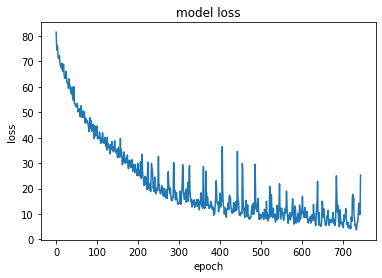

7/7 [==============================] - 1s 4ms/step
      Alpha_Sensor     Winsen       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1685      8.278167  42.491525  31.455000  54.901667  18.752713     17.190728   
1686      6.794068  39.700000  30.840678  55.652542  17.911379     16.447309   
1687      6.483103  36.033333  30.208621  55.636207  16.462367     15.270352   
1688      5.977833  31.650000  29.641667  56.510000  15.316083     14.128016   
1689      5.577119  25.271186  29.301695  57.208475  13.763913     12.447247   
...            ...        ...        ...        ...        ...           ...   
1880     15.161000  51.616667  40.686667  36.980000  19.870257     17.658700   
1881     16.276333  50.898305  43.206667  35.005000  20.776427     17.608351   
1882     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1883     14.746500  42.183333  42.481667  37.700000  19.287850     15.670845   
1884     17.562000  44.864407  39.293333  44.260000  20.557829     17

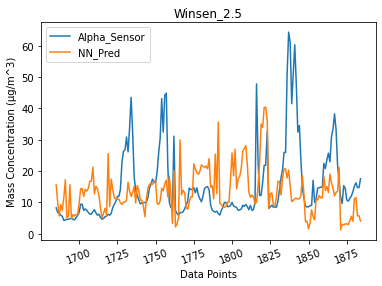

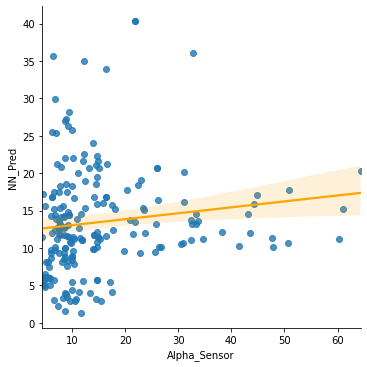

In [7]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 750)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)